In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import PMTPosition as PMT

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


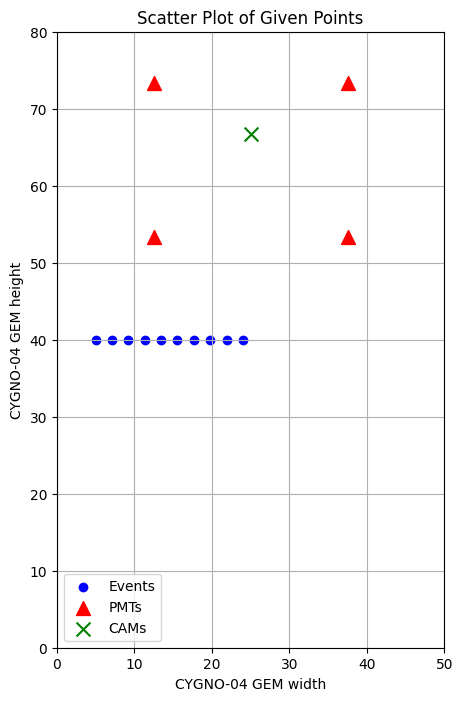

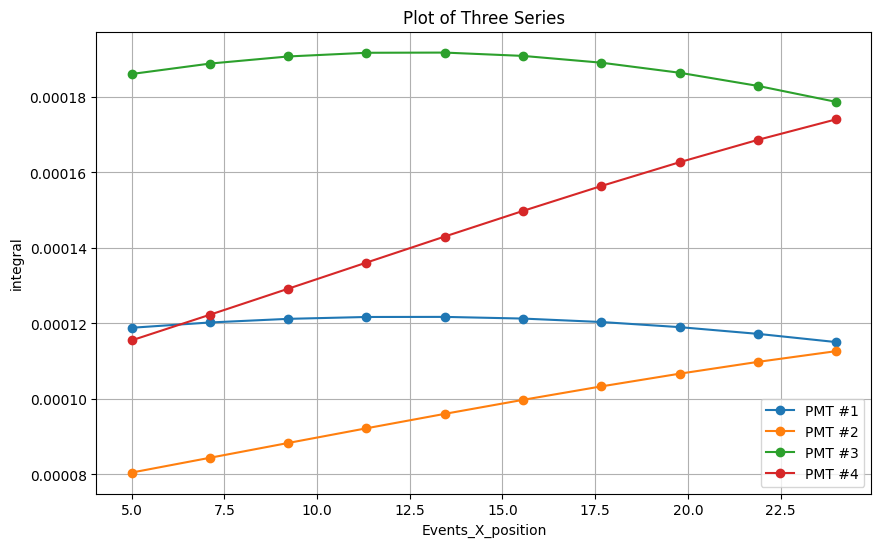

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


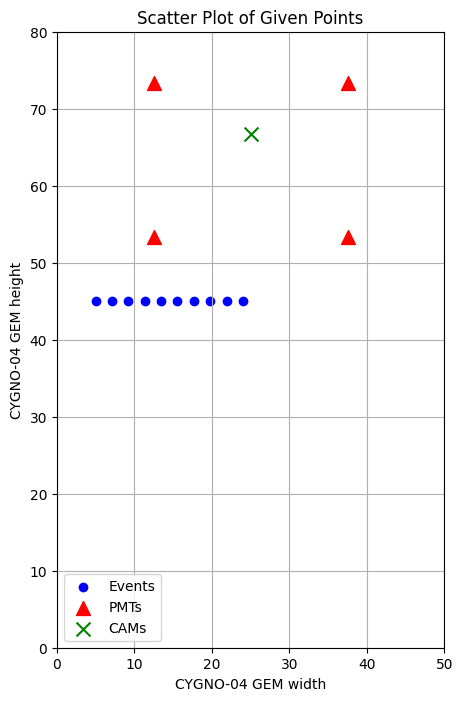

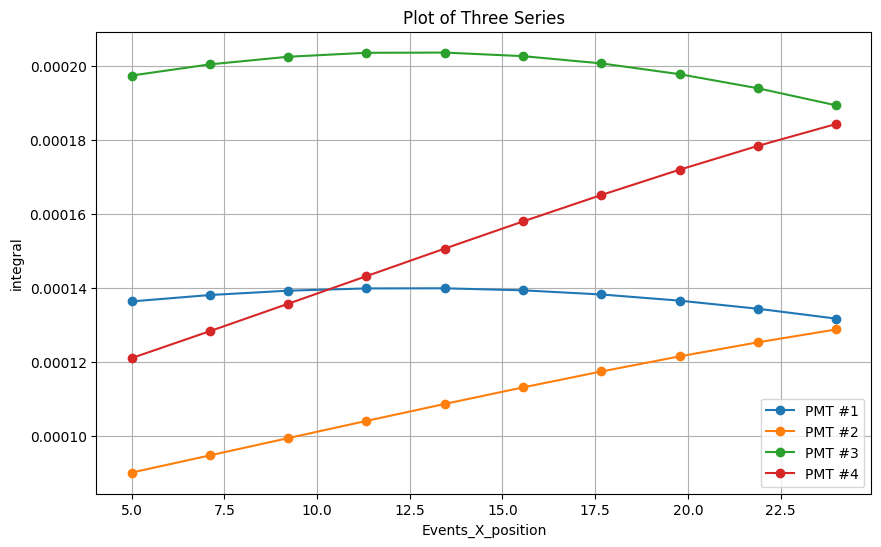

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


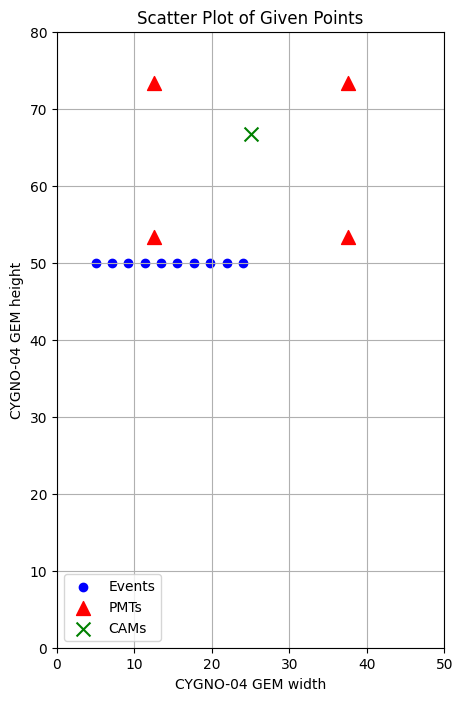

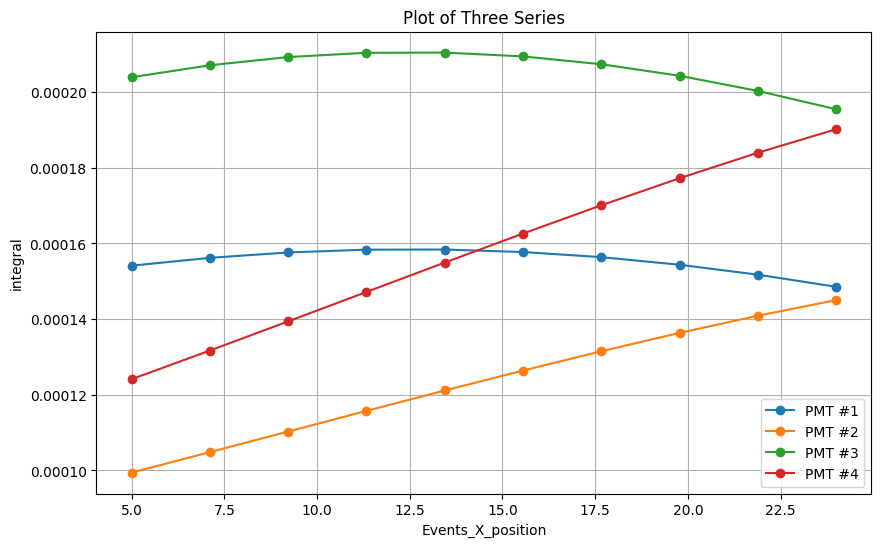

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


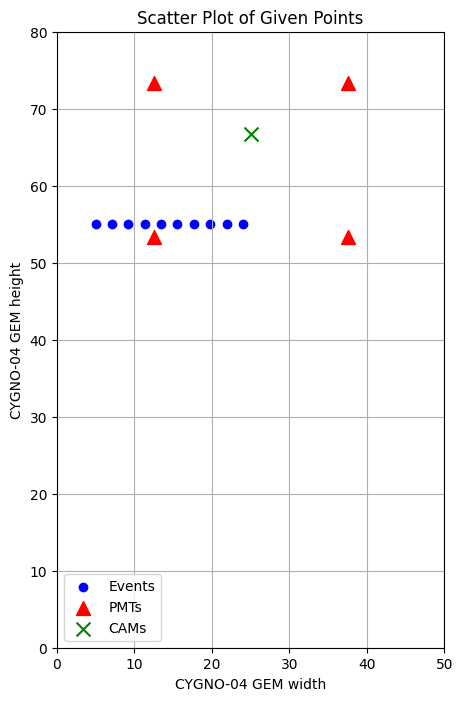

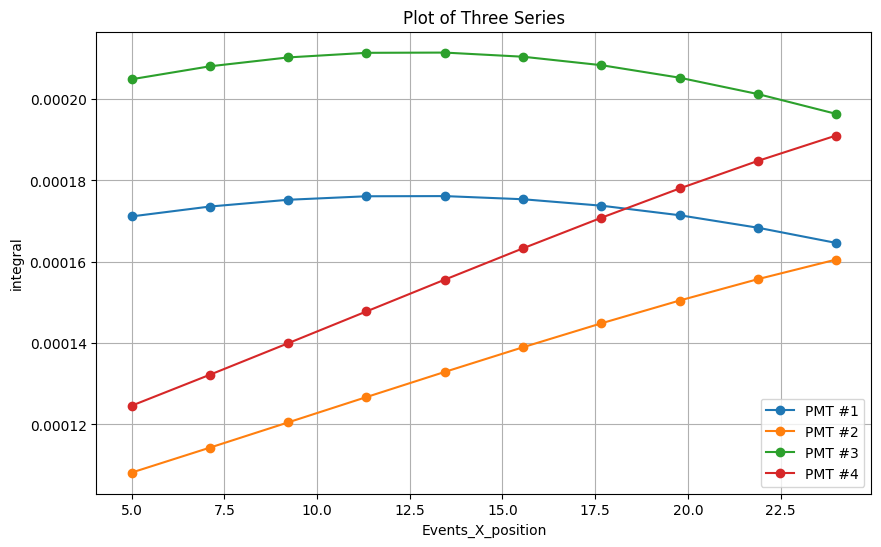

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


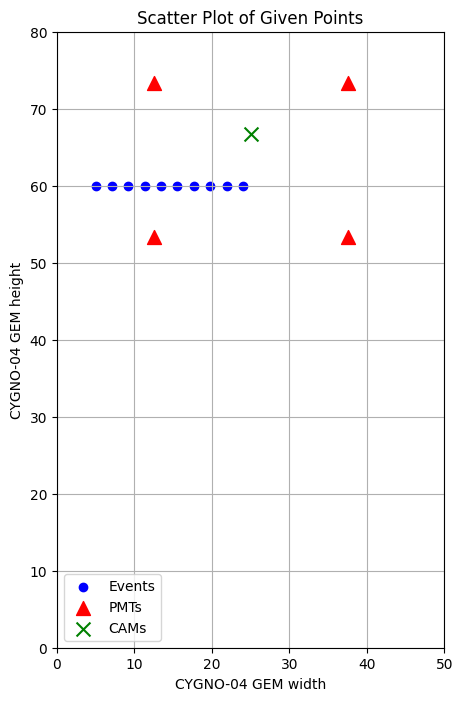

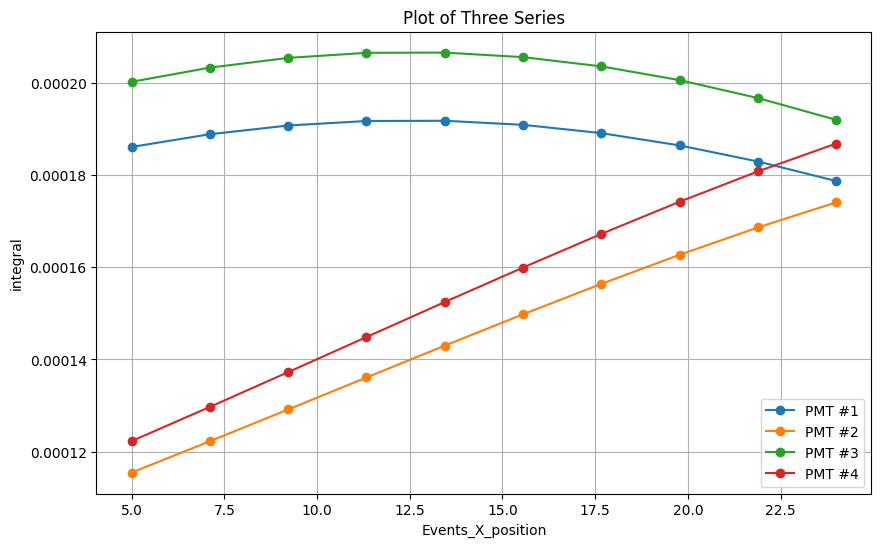

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


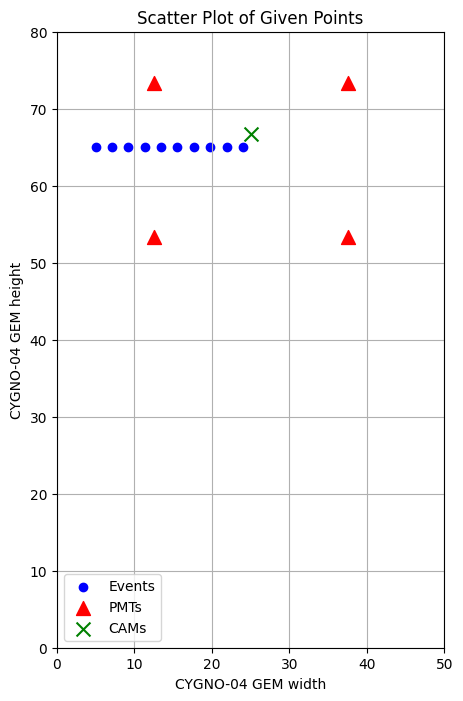

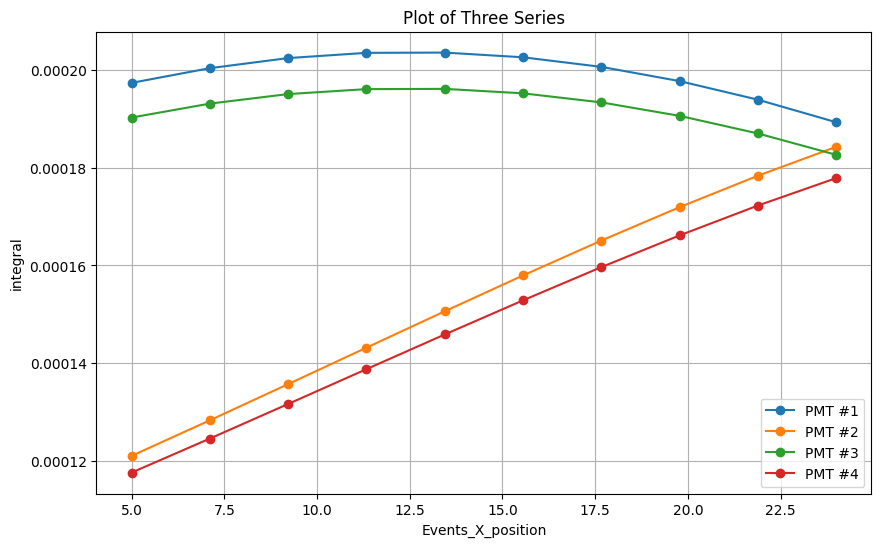

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


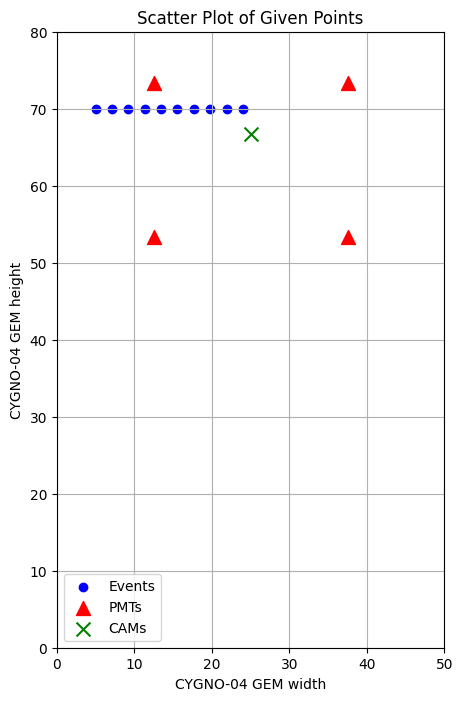

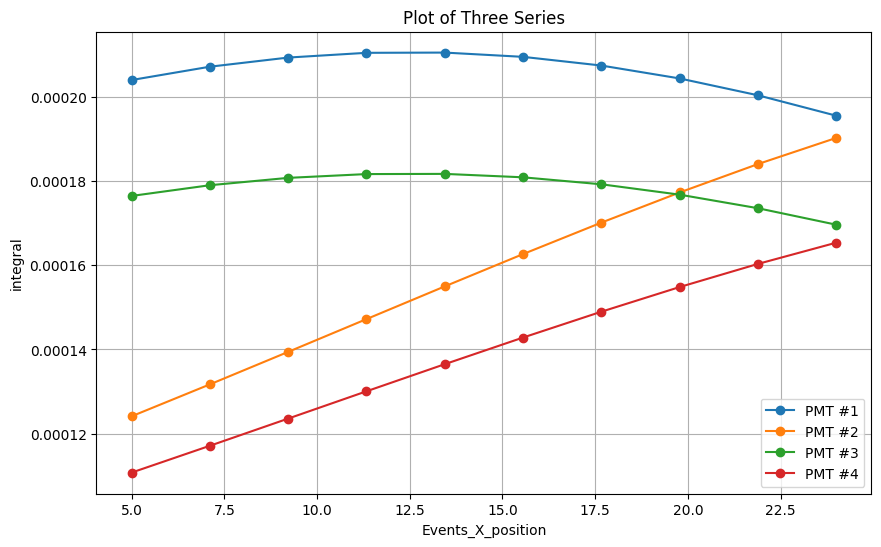

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


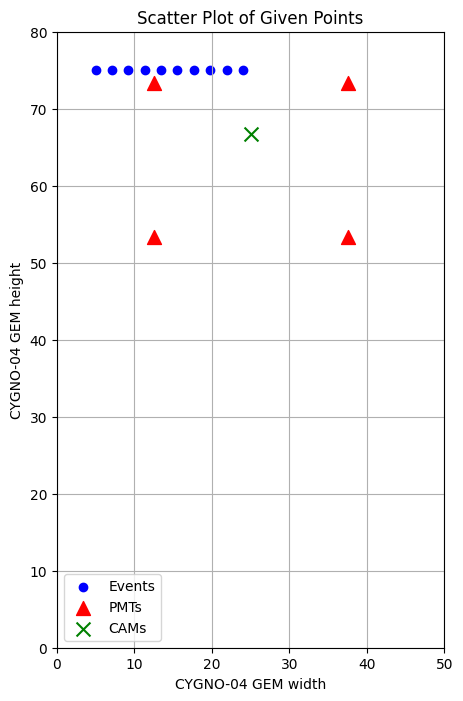

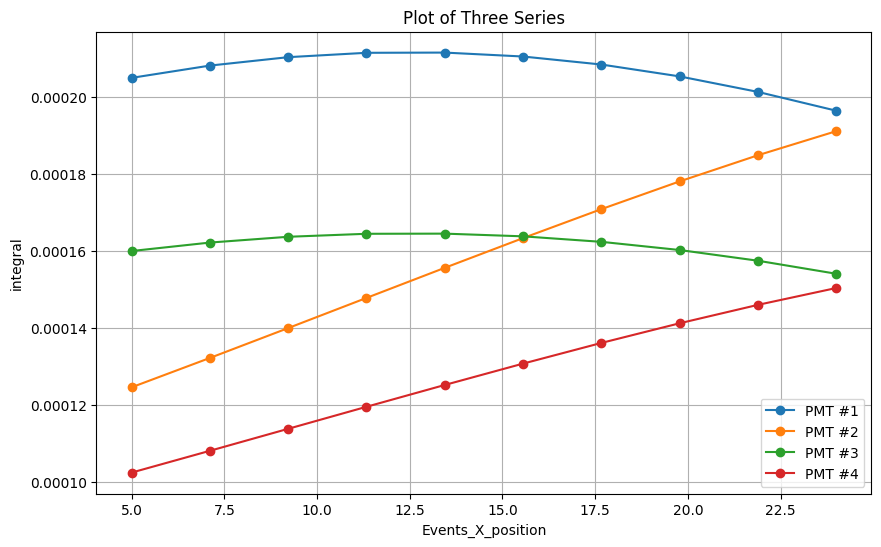

CAMs positions:
 [[25.         66.66666667]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


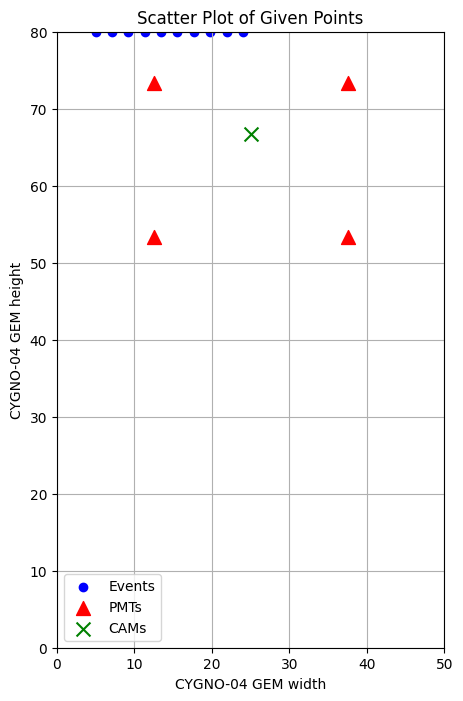

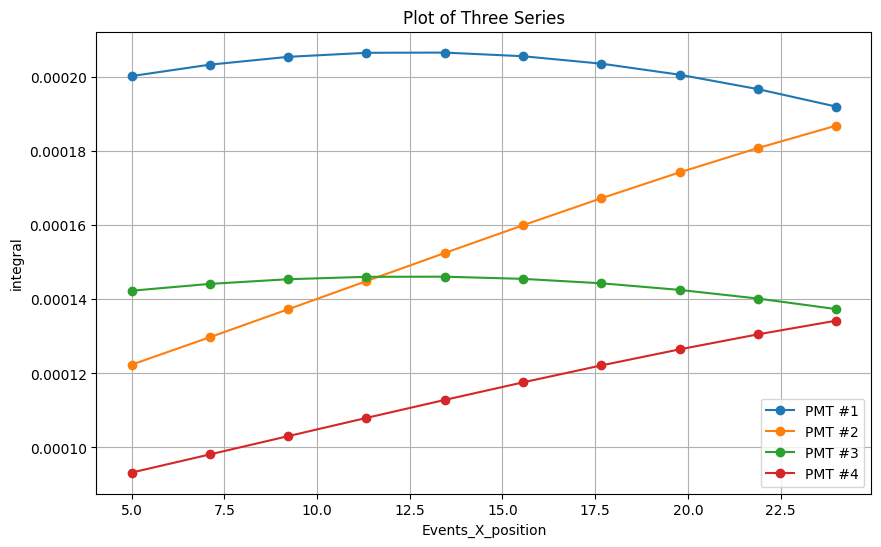

[[0.0011965605085622482, 0.0009736223584340977, 0.0018767010926874742, 0.0014575356262296107], [0.0013733144949834995, 0.0011026178217073467, 0.0019916776550323294, 0.0015363222436028778], [0.0015534079554746843, 0.0012315866496424588, 0.0020580175353671687, 0.0015814316928231603], [0.0017257680894568544, 0.0013528907839858535, 0.0020677646356246924, 0.0015880384686556925], [0.0018767010926874742, 0.001457535626229611, 0.0020197103756397538, 0.0015554143936557508], [0.0019916776550323294, 0.0015363222436028778, 0.0019197147929662071, 0.0014871019161559196], [0.0020580175353671695, 0.001581431692823161, 0.001779183077031284, 0.001390087460718646], [0.0020677646356246924, 0.0015880384686556925, 0.0016123553308626634, 0.0012732979016520408], [0.0020197103756397538, 0.0015554143936557508, 0.001433455337613337, 0.0011459509152283915]]


In [2]:
GEM_width,  GEM_height = PMT.GetGEMsDim()
GEM_z_dist = PMT.GetGEMsZ()

#General variables of interest for analysis
sum_integrals = []
# y_pos = [45,60,75]
y_pos = [40,45,50,55,60,65,70,75,80]
# y_pos = [45]
n_PMTS = 4
for y_p in y_pos:    
    n_events = 10
    pos = PMT.GenEventPosition(x_offset = 0.0, size = n_events, distribution = 'fixedY', x_start = 5, x_end = 24,  y_offset = y_p)
    
    ####  Plotting PMTs
    ## Reduced scheme scheme
    PMT_pos = np.array([[GEM_width/2- 1*GEM_width/2/2, GEM_height/3*3 - GEM_height/3/4], [GEM_width/2+ GEM_width/2/2, GEM_height/3*3 - GEM_height/3/4],
                        [GEM_width/2- 1*GEM_width/2/2, GEM_height/3*2],                  [GEM_width/2+ GEM_width/2/2, GEM_height/3*2]])
    CAM_pos = np.array([[GEM_width/2,GEM_height/3*3 - GEM_height/3/2]])
    
    print("CAMs positions:\n {}".format(CAM_pos))
    print("PMTs positions:\n {}".format(PMT_pos))
    
    plt.figure(figsize=(5, 8))
    plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Events')
    plt.scatter(PMT_pos[:, 0], PMT_pos[:, 1], color='red', label='PMTs', marker='^', s=100)
    plt.scatter(CAM_pos[:, 0], CAM_pos[:, 1], color='green', label='CAMs', marker='x', s=100)
    
    plt.xlabel('CYGNO-04 GEM width')
    plt.ylabel('CYGNO-04 GEM height')
    plt.xlim(0,GEM_width)
    plt.ylim(0,GEM_height)
    plt.title('Scatter Plot of Given Points')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    n_PMTS = len(PMT_pos)
    R_all   = PMT.GetR_All(PMT_pos = PMT_pos, Event_pos = pos)
    ints = PMT.GetIntegrals(R_all, energy = 5.9, LY = 8500.0)
    
    series_data = []
    for i in range(n_PMTS):
        n_series = ints[:,i]
        series_data.append(n_series)
    
    
    x_values = pos[:,0]
    plt.figure(figsize=(10, 6))
    for pmt_i in range(len(series_data)):
        plt.plot(x_values, series_data[pmt_i], marker='o', label='PMT #{}'.format(pmt_i+1))
    
    plt.xlabel('Events_X_position')
    plt.ylabel('integral')
    plt.title('Plot of Three Series')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    ## Create input for BAT
    PMT.create_bat_input(fname = "./outputs/output_bat_y_{}.txt".format(y_p), n_evts = n_events, ints = ints)

    ## Create final variables
    points_sums = []
    for i_s in range(len(series_data)):
        points_sums.append(sum(series_data[i_s]))
    sum_integrals.append(points_sums)

print(sum_integrals)

No handles with labels found to put in legend.


[[0.0011965605085622482, 0.0009736223584340977, 0.0018767010926874742, 0.0014575356262296107], [0.0013733144949834995, 0.0011026178217073467, 0.0019916776550323294, 0.0015363222436028778], [0.0015534079554746843, 0.0012315866496424588, 0.0020580175353671687, 0.0015814316928231603], [0.0017257680894568544, 0.0013528907839858535, 0.0020677646356246924, 0.0015880384686556925], [0.0018767010926874742, 0.001457535626229611, 0.0020197103756397538, 0.0015554143936557508], [0.0019916776550323294, 0.0015363222436028778, 0.0019197147929662071, 0.0014871019161559196], [0.0020580175353671695, 0.001581431692823161, 0.001779183077031284, 0.001390087460718646], [0.0020677646356246924, 0.0015880384686556925, 0.0016123553308626634, 0.0012732979016520408], [0.0020197103756397538, 0.0015554143936557508, 0.001433455337613337, 0.0011459509152283915]]


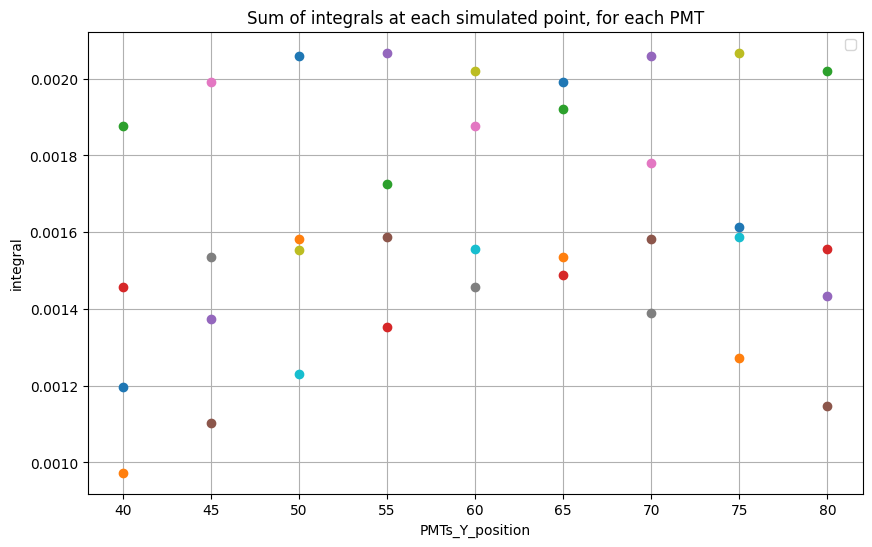

In [3]:
plt.figure(figsize=(10, 6))

print(sum_integrals)
for y_i in range(len(y_pos)):
    for pmt_i in range(n_PMTS):
        plt.plot(y_pos[y_i], sum_integrals[y_i][pmt_i], marker='o')

plt.xlabel('PMTs_Y_position')
plt.ylabel('integral')
plt.title('Sum of integrals at each simulated point, for each PMT')
plt.legend()
plt.grid(True)
plt.show()